<a href="https://colab.research.google.com/github/Shivachikkonda02/-Bank-Marketing-Analysis-and-Classification-ML-Project/blob/main/Stock_Price_Prediction_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
!pip install quandl

In [6]:
import quandl

In [7]:
data=quandl.get('NSE/TATAGLOBAL')
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [8]:
data.isna().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

<Axes: xlabel='Date'>

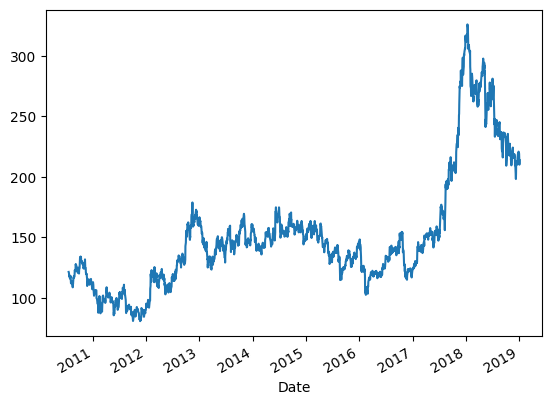

In [9]:
data['Close'].plot()

In [10]:
data['open - close']=data['Open']-data['Close']
data['high - low']=data['High']-data['Low']
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),open - close,high - low
Date,,,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56,0.55,1.95
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17,-0.60,1.75
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31,1.15,1.70
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01,2.50,3.90
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98,-1.05,7.50


In [11]:
data.isna().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
open - close            0
high - low              0
dtype: int64

In [12]:
x=data[['open - close','high - low']]
x.head()

,open - close,high - low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


In [13]:
y=np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [14]:
y

array([-1, -1, -1, ..., -1,  1, -1])

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=44)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [18]:
# using gridsearchcv to find the best parameter
params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

knn=KNeighborsClassifier()
model=GridSearchCV(knn,params,cv=5)
model.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [19]:
model.score(x_test,y_test)

0.5066666666666667

In [20]:
model.score(x_train,y_train)

0.6755555555555556

In [21]:
pred_class=model.predict(x_test)

In [22]:
actual_pred=pd.DataFrame({'Actual_class':y_test,'Predicted_class':pred_class})
actual_pred.head()

,Actual_class,Predicted_class
0,-1,1
1,1,1
2,1,-1
3,1,1
4,-1,-1


In [30]:
## Prevent Overfitting

for i in range(1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_train,y_train)
  print(i,model.score(x_train,y_train), ',',model.score(x_test,y_test))

1 0.9885714285714285 , 0.5066666666666667
2 0.7587301587301587 , 0.5257142857142857
3 0.7568253968253968 , 0.4895238095238095
4 0.6863492063492064 , 0.4857142857142857
5 0.7028571428571428 , 0.49523809523809526
6 0.660952380952381 , 0.49333333333333335
7 0.6755555555555556 , 0.5066666666666667
8 0.6565079365079365 , 0.49142857142857144
9 0.6628571428571428 , 0.5047619047619047
10 0.645079365079365 , 0.5257142857142857
11 0.6311111111111111 , 0.5295238095238095
12 0.6215873015873016 , 0.5104761904761905
13 0.6253968253968254 , 0.518095238095238
14 0.6241269841269841 , 0.5066666666666667
15 0.6323809523809524 , 0.4990476190476191
16 0.626031746031746 , 0.49714285714285716
17 0.6209523809523809 , 0.5085714285714286
18 0.6171428571428571 , 0.5028571428571429
19 0.6139682539682539 , 0.5238095238095238
20 0.6095238095238096 , 0.5028571428571429
21 0.5974603174603175 , 0.49714285714285716
22 0.5968253968253968 , 0.5276190476190477
23 0.5923809523809523 , 0.5219047619047619
24 0.59174603174603